# Macroeconomics project

# Task 2

### Importing essential libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
from statsmodels.tsa.stattools import ccf
import warnings
warnings.filterwarnings('ignore')

### Load acquired data

In [2]:
data = pd.read_csv('macro.csv').set_index('Date')

### Derive columns to use further

In [3]:
columns = data.columns
columns

Index(['GDP', 'PCEC', 'GDP_Implicit_Price_Deflator_inflation',
       'CPI_less_food_and_energy', 'total_CPI', 'Investments', 'Inventories',
       'Wilshire_5000_Full_Cap_Price_Index', 'Real_Estate_Prices',
       'Long-term_rate_nominal', 'Short-term_rate_nominal', 'Yield_curve',
       'Real_ef_exchange_rate', 'DM_USD_exchange_rate', 'M1', 'M3'],
      dtype='object')

### Filter data as it was in the article

In [4]:
for i in columns:
    data[f'{i} filtered'] = sm.tsa.filters.bkfilter(data[f'{i}'].dropna(), 6, 40, 8)
data.tail()

,GDP,PCEC,GDP_Implicit_Price_Deflator_inflation,CPI_less_food_and_energy,total_CPI,Investments,Inventories,Wilshire_5000_Full_Cap_Price_Index,Real_Estate_Prices,Long-term_rate_nominal,...,Inventories filtered,Wilshire_5000_Full_Cap_Price_Index filtered,Real_Estate_Prices filtered,Long-term_rate_nominal filtered,Short-term_rate_nominal filtered,Yield_curve filtered,Real_ef_exchange_rate filtered,DM_USD_exchange_rate filtered,M1 filtered,M3 filtered
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,23046.934,15813.545,6.4,2.504185,0.339103,3943.400,3176.816,43813.322344,NaN,0.058906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,23550.420,16147.297,6.2,2.442802,0.287313,4109.122,3239.884,45986.152188,NaN,0.072813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,24349.121,16517.976,6.8,3.238340,0.388553,4499.171,3394.375,47478.708594,NaN,0.188226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,24740.480,16874.769,8.4,4.277553,0.532822,4671.027,3611.694,45005.218065,NaN,0.940484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,25248.476,17261.338,9.1,5.041692,0.609753,4609.927,3777.222,40965.785000,NaN,2.113548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Look through new filtered columns

In [5]:
data.columns

Index(['GDP', 'PCEC', 'GDP_Implicit_Price_Deflator_inflation',
       'CPI_less_food_and_energy', 'total_CPI', 'Investments', 'Inventories',
       'Wilshire_5000_Full_Cap_Price_Index', 'Real_Estate_Prices',
       'Long-term_rate_nominal', 'Short-term_rate_nominal', 'Yield_curve',
       'Real_ef_exchange_rate', 'DM_USD_exchange_rate', 'M1', 'M3',
       'GDP filtered', 'PCEC filtered',
       'GDP_Implicit_Price_Deflator_inflation filtered',
       'CPI_less_food_and_energy filtered', 'total_CPI filtered',
       'Investments filtered', 'Inventories filtered',
       'Wilshire_5000_Full_Cap_Price_Index filtered',
       'Real_Estate_Prices filtered', 'Long-term_rate_nominal filtered',
       'Short-term_rate_nominal filtered', 'Yield_curve filtered',
       'Real_ef_exchange_rate filtered', 'DM_USD_exchange_rate filtered',
       'M1 filtered', 'M3 filtered'],
      dtype='object')

### Generate plots

In [6]:
list(range(0,len(data.iloc[:, 0]) , 20))

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]

In [7]:
def visualize_plots(data, cols, suptitle=''):
    fig, axs = plt.subplots(4, 2, figsize=(24, 18))
    plt.suptitle(suptitle, fontsize=30)
    counter = 0
    for i in range(0, 4):
        for j in range(0, 2):
            if counter == len(cols):
                break
            col = cols[counter]
            plt.subplot(4, 2,counter+1, xticks=list(range(0,len(data.iloc[:, counter]) , 20)),
                       xticklabels=list(range(0,len(data.iloc[:, counter]) , 20)))
            plt.title(f'Business cycle component of {cols[counter]}')
            plt.plot(data[f'{cols[counter]} filtered'])
            counter += 1

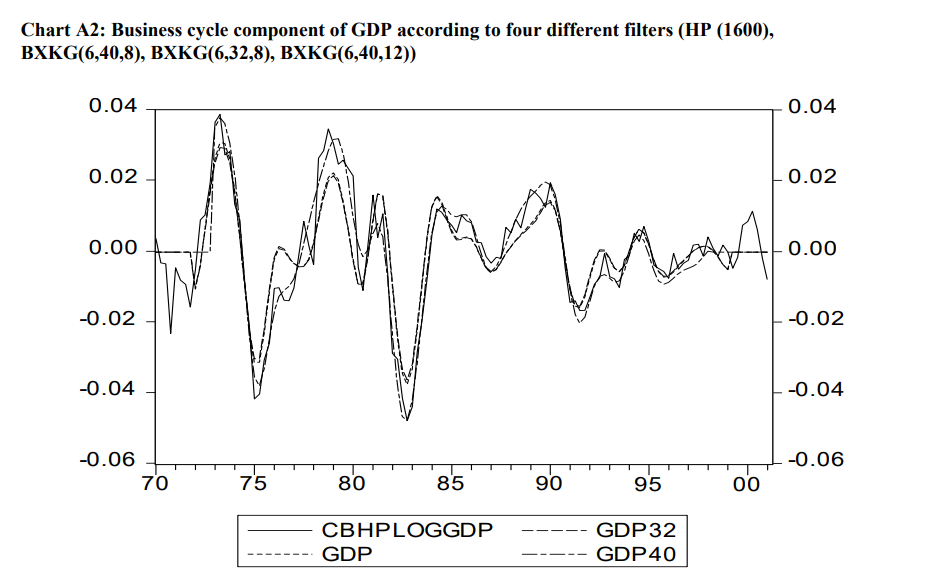

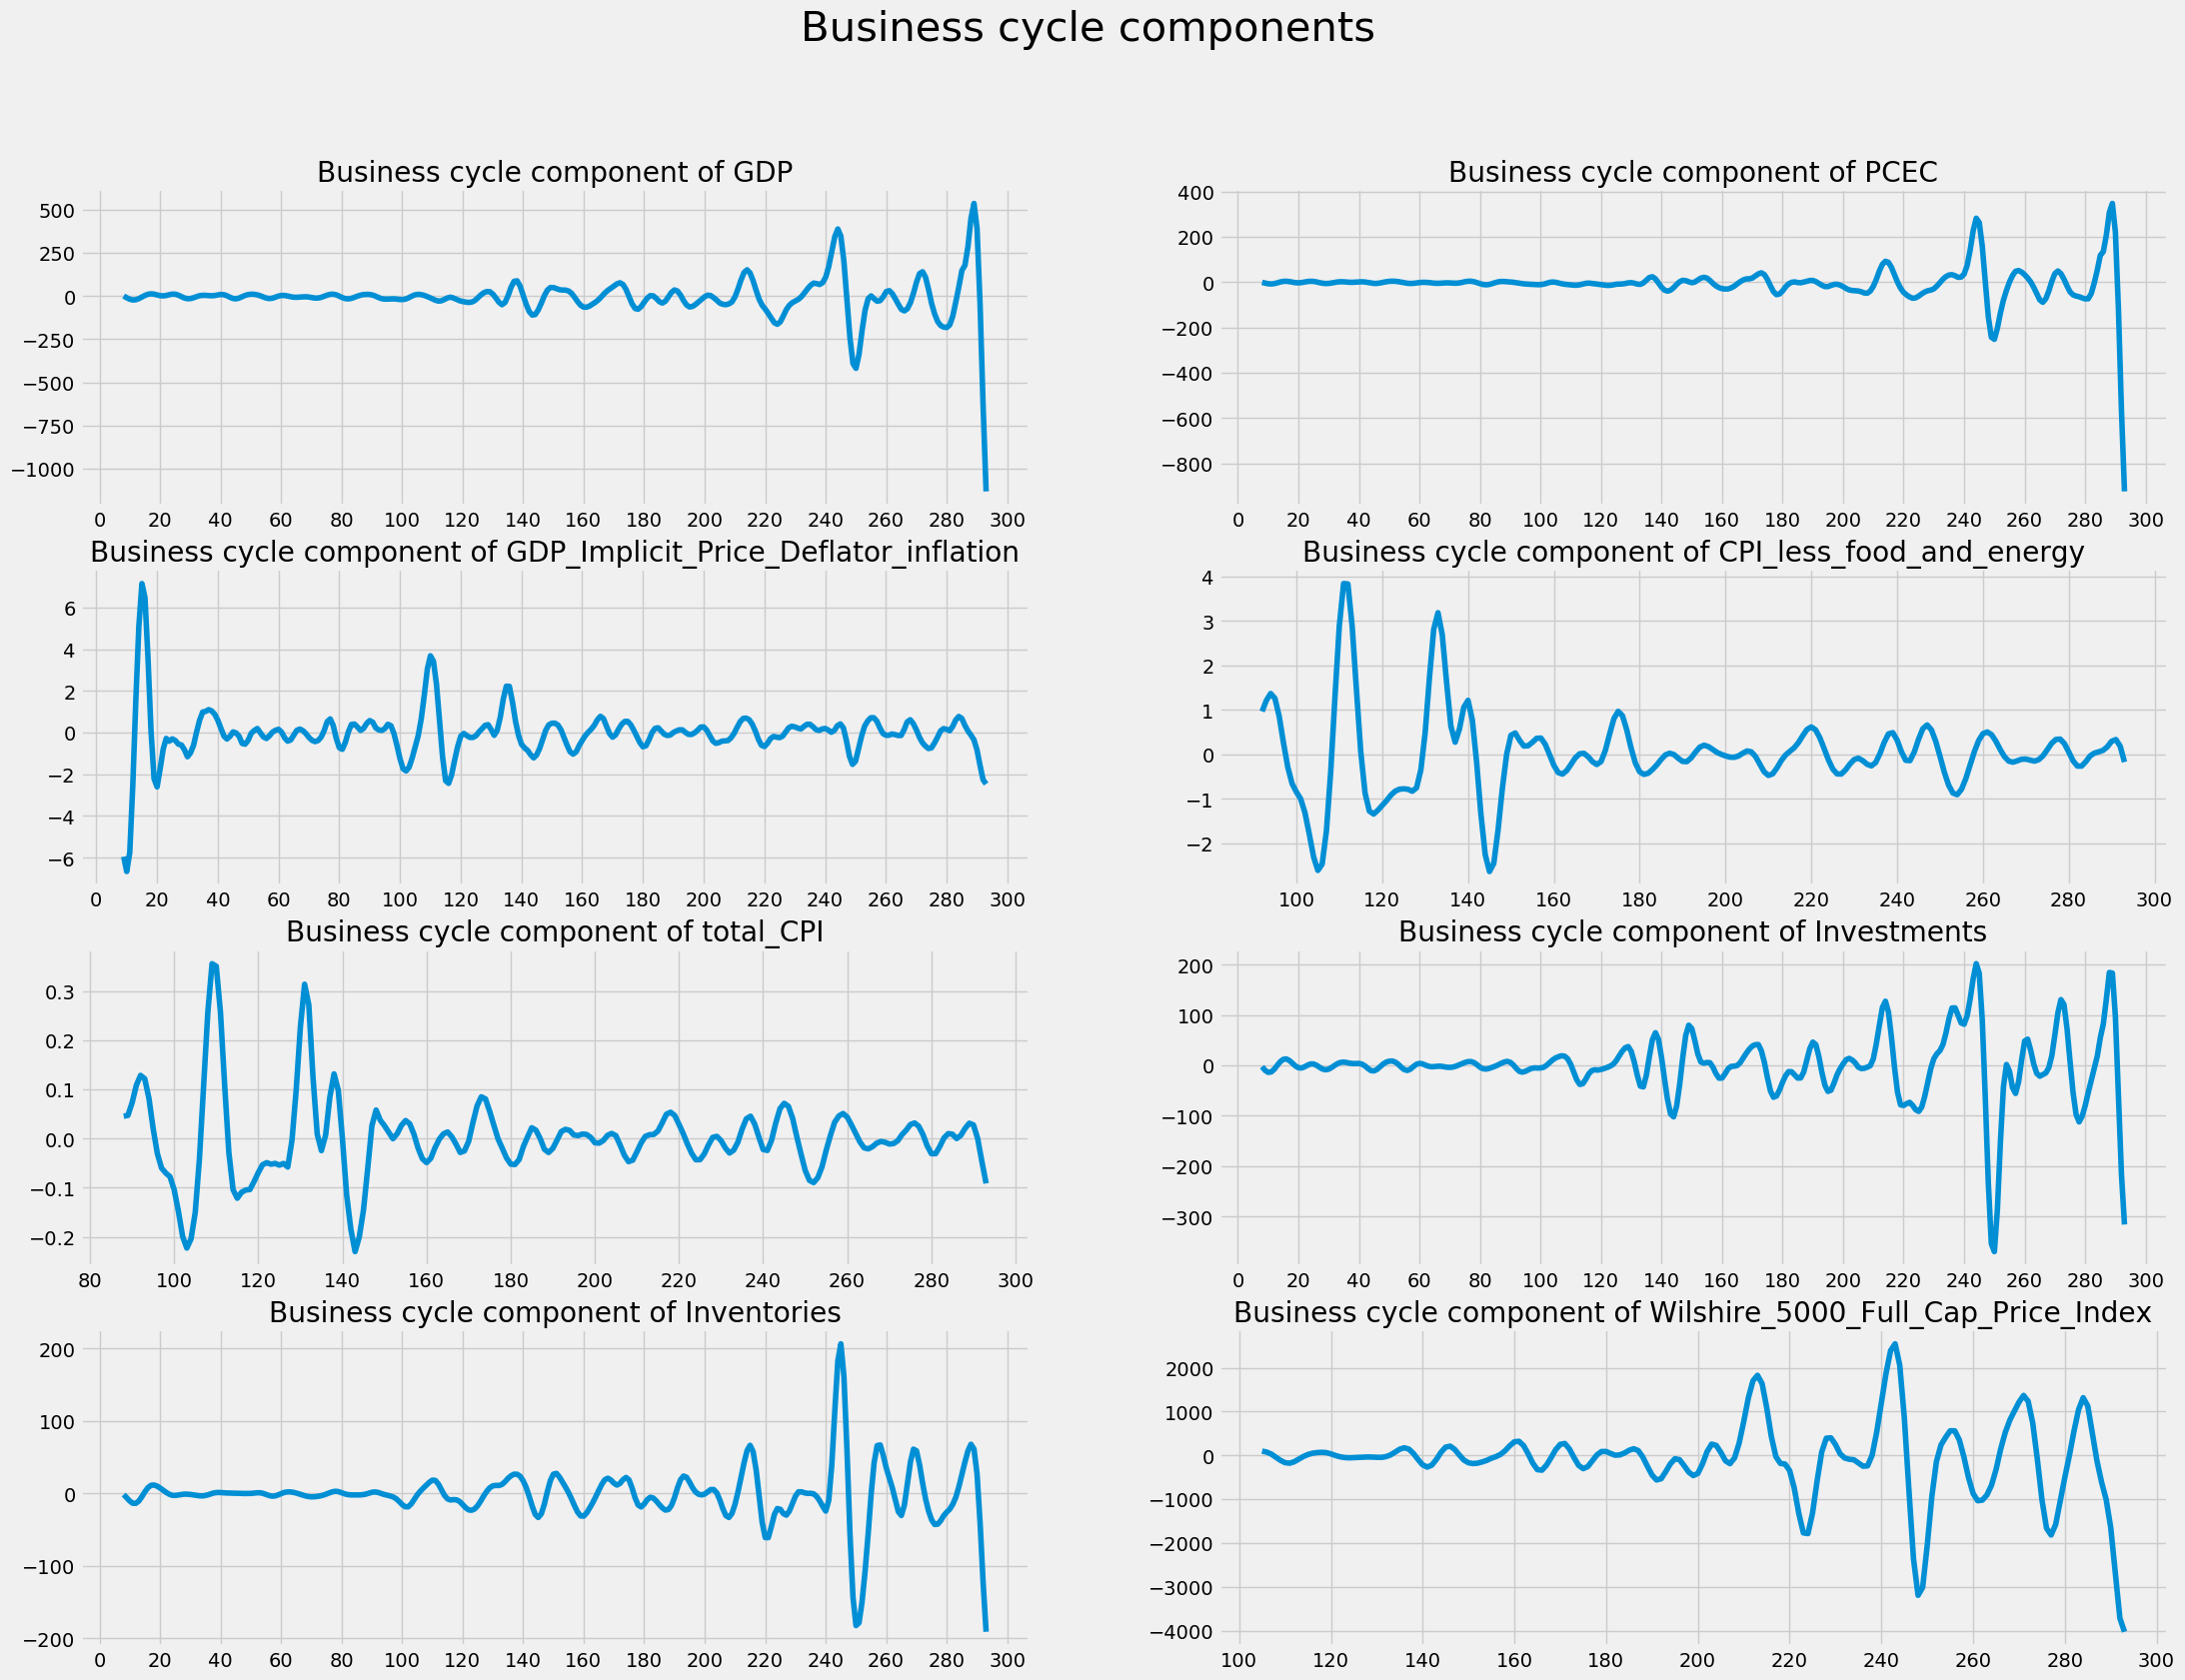

In [8]:
visualize_plots(data, columns, suptitle='Business cycle components')

### Function to count cross correlation

In [9]:
def count_ccf(data, xlabel, ylabel):
    '''
    Function to count cross correlation between two factors with lag 4
    '''
    
    data = data[(data.index>'1969-12-01')&(data.index<'2001-01-01')].copy()
    
    forwards = ccf(data[xlabel], data[ylabel], adjusted=False)
    backwards = ccf(data[xlabel][::-1], data[ylabel][::-1], adjusted=False)[::-1]
    ccf_output = np.r_[backwards[-5:-1], forwards[:5]]

    return ccf_output

### Derive columns to use for final table

In [10]:
cols_to_use = [col for col in data.columns if 'filtered' in col]

### Calculate cross correlations with GDP and other factors and get the final table

In [11]:
results = []

for col in cols_to_use:
    ser = pd.Series(count_ccf(data, 'GDP filtered', col), name=col, index=range(-4, 5))
    results.append(ser)

final_table = pd.concat(results, axis=1).T

col_names = list(zip(['Cross correlation with GDP(t+k)' for i in range(9)], [-4, -3, -2, -1, 0, 1, 2, 3, 4]))
final_table.columns = pd.MultiIndex.from_tuples(col_names)
final_table.index.name = 'variables (t)'

final_table

Cross correlation with GDP(t+k)  \
                                                                            -4   
variables (t)                                                                    
GDP filtered                                                         -0.130993   
PCEC filtered                                                        -0.031273   
GDP_Implicit_Price_Deflator_inflation filtered                        0.007351   
CPI_less_food_and_energy filtered                                     0.289940   
total_CPI filtered                                                    0.103266   
Investments filtered                                                 -0.233664   
Inventories filtered                                                  0.154311   
Wilshire_5000_Full_Cap_Price_Index filtered                                NaN   
Real_Estate_Prices filtered                                           0.373196   
Long-term_rate_nominal filtered                                       0.000834   
Short-term_rate_nominal filtered                                      0.152922   
Yield_curve filtered                                                 -0.009641   
Real_ef_exchange_rate filtered                                             NaN   
DM_USD_exchange_rate filtered                                              NaN   
M1 filtered                                                          -0.237829   
M3 filtered                                                           0.001704   

                                                                              \
                                                      -3        -2        -1   
variables (t)                                                                  
GDP filtered                                    0.201487  0.569289  0.867570   
PCEC filtered                                   0.200986  0.474852  0.715516   
GDP_Implicit_Price_Deflator_inflation filtered  0.068960  0.134905  0.197690   
CPI_less_food_and_energy filtered               0.312697  0.264459  0.160750   
total_CPI filtered                              0.219795  0.300261  0.311506   
Investments filtered                            0.112190  0.486566  0.783097   
Inventories filtered                            0.412232  0.621095  0.725443   
Wilshire_5000_Full_Cap_Price_Index filtered          NaN       NaN       NaN   
Real_Estate_Prices filtered                     0.415682  0.370466  0.238471   
Long-term_rate_nominal filtered                 0.278760  0.532985  0.686297   
Short-term_rate_nominal filtered                0.377277  0.549542  0.616195   
Yield_curve filtered                            0.270037  0.526050  0.680335   
Real_ef_exchange_rate filtered                       NaN       NaN       NaN   
DM_USD_exchange_rate filtered                        NaN       NaN       NaN   
M1 filtered                                    -0.296457 -0.318686 -0.292055   
M3 filtered                                    -0.174305 -0.312719 -0.377382   

                                                                              \
                                                       0         1         2   
variables (t)                                                                  
GDP filtered                                    1.000000  0.867570  0.569289   
PCEC filtered                                   0.843222  0.742144  0.517365   
GDP_Implicit_Price_Deflator_inflation filtered  0.245093  0.252488  0.227389   
CPI_less_food_and_energy filtered               0.038145 -0.063163 -0.112870   
total_CPI filtered                              0.245078  0.121947 -0.004694   
Investments filtered                            0.912355  0.791697  0.521740   
Inventories filtered                            0.696332  0.482049  0.228867   
Wilshire_5000_Full_Cap_Price_Index filtered          NaN       NaN       NaN   
Real_Estate_Prices filtered                     0.045750 -0.200787 -0.355666   
Long-te

### Table from the article

![alt text](https://user-images.githubusercontent.com/9265326/188273084-eb1b5f85-bbfe-4704-9701-8a10aecf5b8f.png)

-----